**Submission Pertama**
- **Nama:** Aulia Afifah
- **Email:** auliaafifah2205@gmail.com
- **ID Dicoding:** auliaafifah253



# Data Loading

import library yang dibutuhkan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

Masukkan dataset dan lihat isi dataset 5 baris di awal

In [2]:
df = pd.read_csv('BABA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,216.600006,219.979996,216.539993,219.770004,216.854889,15873500
1,2020-01-03,216.350006,218.203003,216.009995,217.000000,214.121628,8604500
2,2020-01-06,214.889999,217.160004,214.089996,216.639999,213.766403,11885500
3,2020-01-07,217.639999,218.940002,216.690002,217.630005,214.743286,9388000
4,2020-01-08,216.600006,220.649994,216.320007,218.000000,215.108368,11959100


# Exploratory Data Analysis

## Exploratory Data Analysis - Deskripsi Variabel

menghapus kolom yang tidak diperlukan dengan fitur drop()

In [3]:
df = df.drop(columns=['Date'])

mengecek missing value dengan fitur isna().sum()

In [4]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

mengecek informasi pada dataset dengan fungsi info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1089 non-null   float64
 1   High       1089 non-null   float64
 2   Low        1089 non-null   float64
 3   Close      1089 non-null   float64
 4   Adj Close  1089 non-null   float64
 5   Volume     1089 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 51.2 KB


mengecek deskripsi statistik data dengan fitur describe()

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1.089000e+03
mean,150.177948,152.207784,147.879644,150.054242,148.144197,2.110515e+07
std,71.933817,72.514735,71.024513,71.831161,70.792959,1.359273e+07
min,63.200001,64.099998,58.009998,63.150002,62.312359,6.231400e+06
25%,86.970001,88.379997,85.650002,86.889999,85.737457,1.355850e+07
50%,116.750000,119.709999,114.300003,117.239998,115.684883,1.788920e+07
75%,216.350006,218.229996,213.500000,216.639999,213.766403,2.365050e+07
max,313.500000,319.320007,308.910004,317.140015,312.933350,1.598343e+08


## Exploratory Data Analysis - Menangani outliers

In [7]:
df.shape

(1089, 6)

visualisasikan data df dengan boxplot untuk mendeteksi outliers

<Axes: xlabel='Open'>

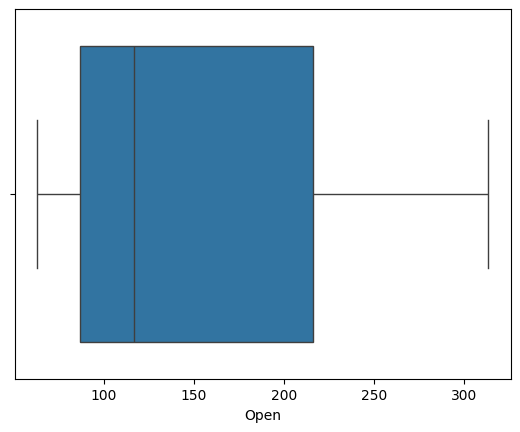

In [8]:
sns.boxplot(x=df['Open'])

<Axes: xlabel='High'>

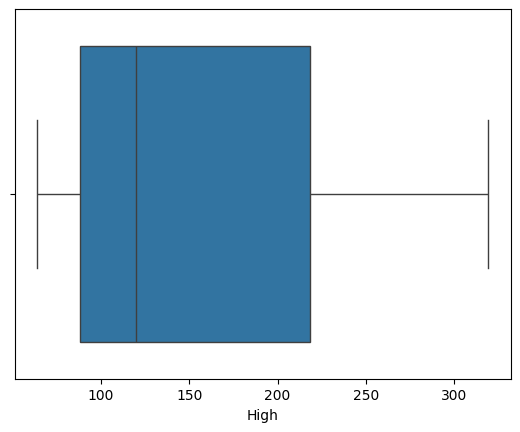

In [9]:
sns.boxplot(x=df['High'])

<Axes: xlabel='Low'>

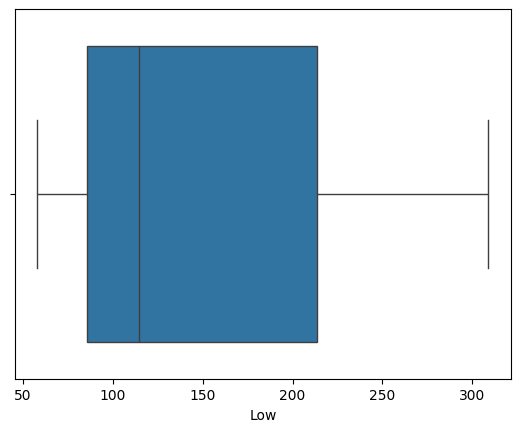

In [10]:
sns.boxplot(x=df['Low'])

<Axes: xlabel='Close'>

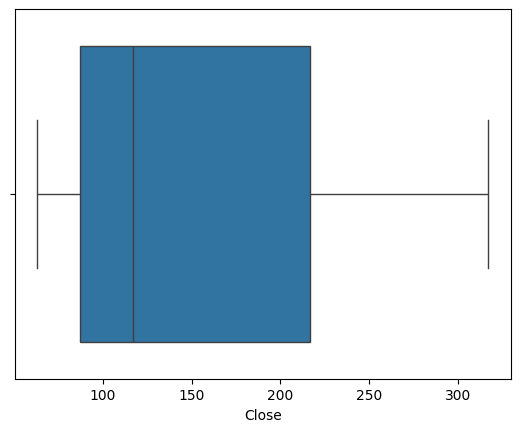

In [11]:
sns.boxplot(x=df['Close'])

<Axes: xlabel='Adj Close'>

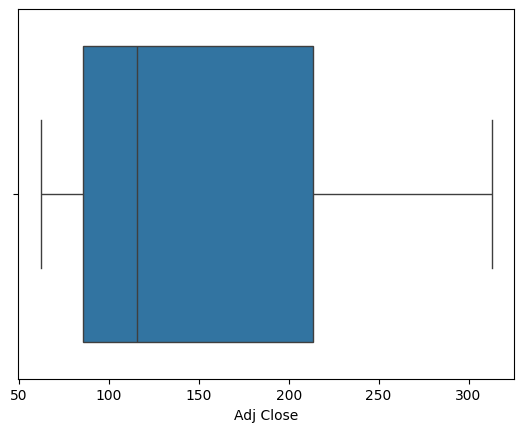

In [12]:
sns.boxplot(x=df['Adj Close'])

<Axes: xlabel='Volume'>

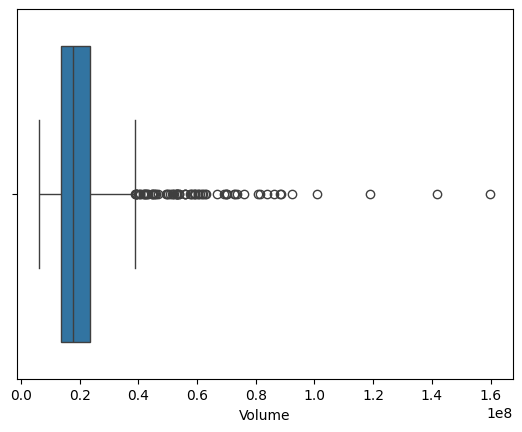

In [13]:
sns.boxplot(x=df['Volume'])

Pada kolom volume terlhat, bahwa terdapat outliers

Mengatasi outliers tersebut dengan metode IQR

In [14]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

df = df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis=1)]

In [15]:
df.shape

(1017, 6)

Dataset Anda sekarang telah bersih dan memiliki 1.017 sampel

## Explaratory Data Analysis - Univariate Analysis

melihat histogram masing-masing fiturnya

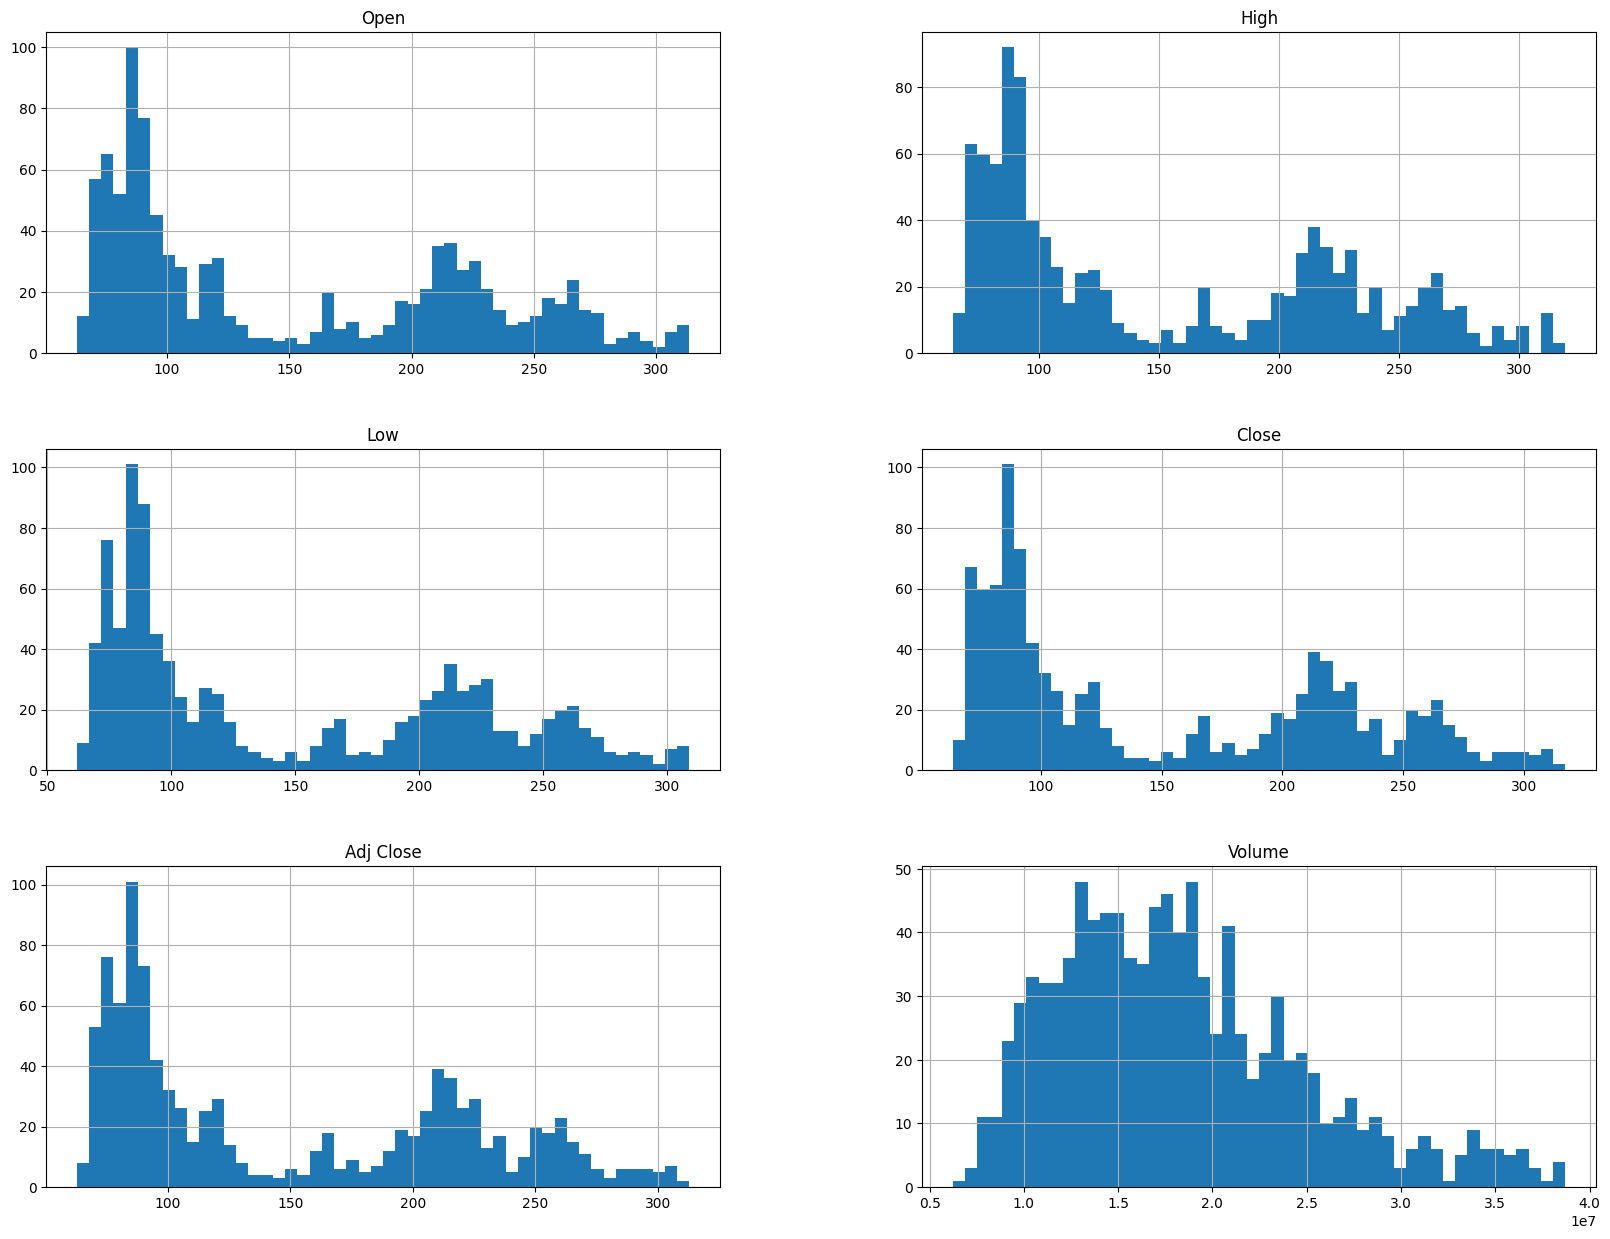

In [16]:
df.hist(bins=50, figsize=(20,15))
plt.show()

histogram untuk variabel "Adj Close" yang merupakan fitur target (label) pada data

## Exploratory Data Analysis - Multivariate Analysis

mengamati hubungan antara fitur numerik menggunakan fungsi pairplot()

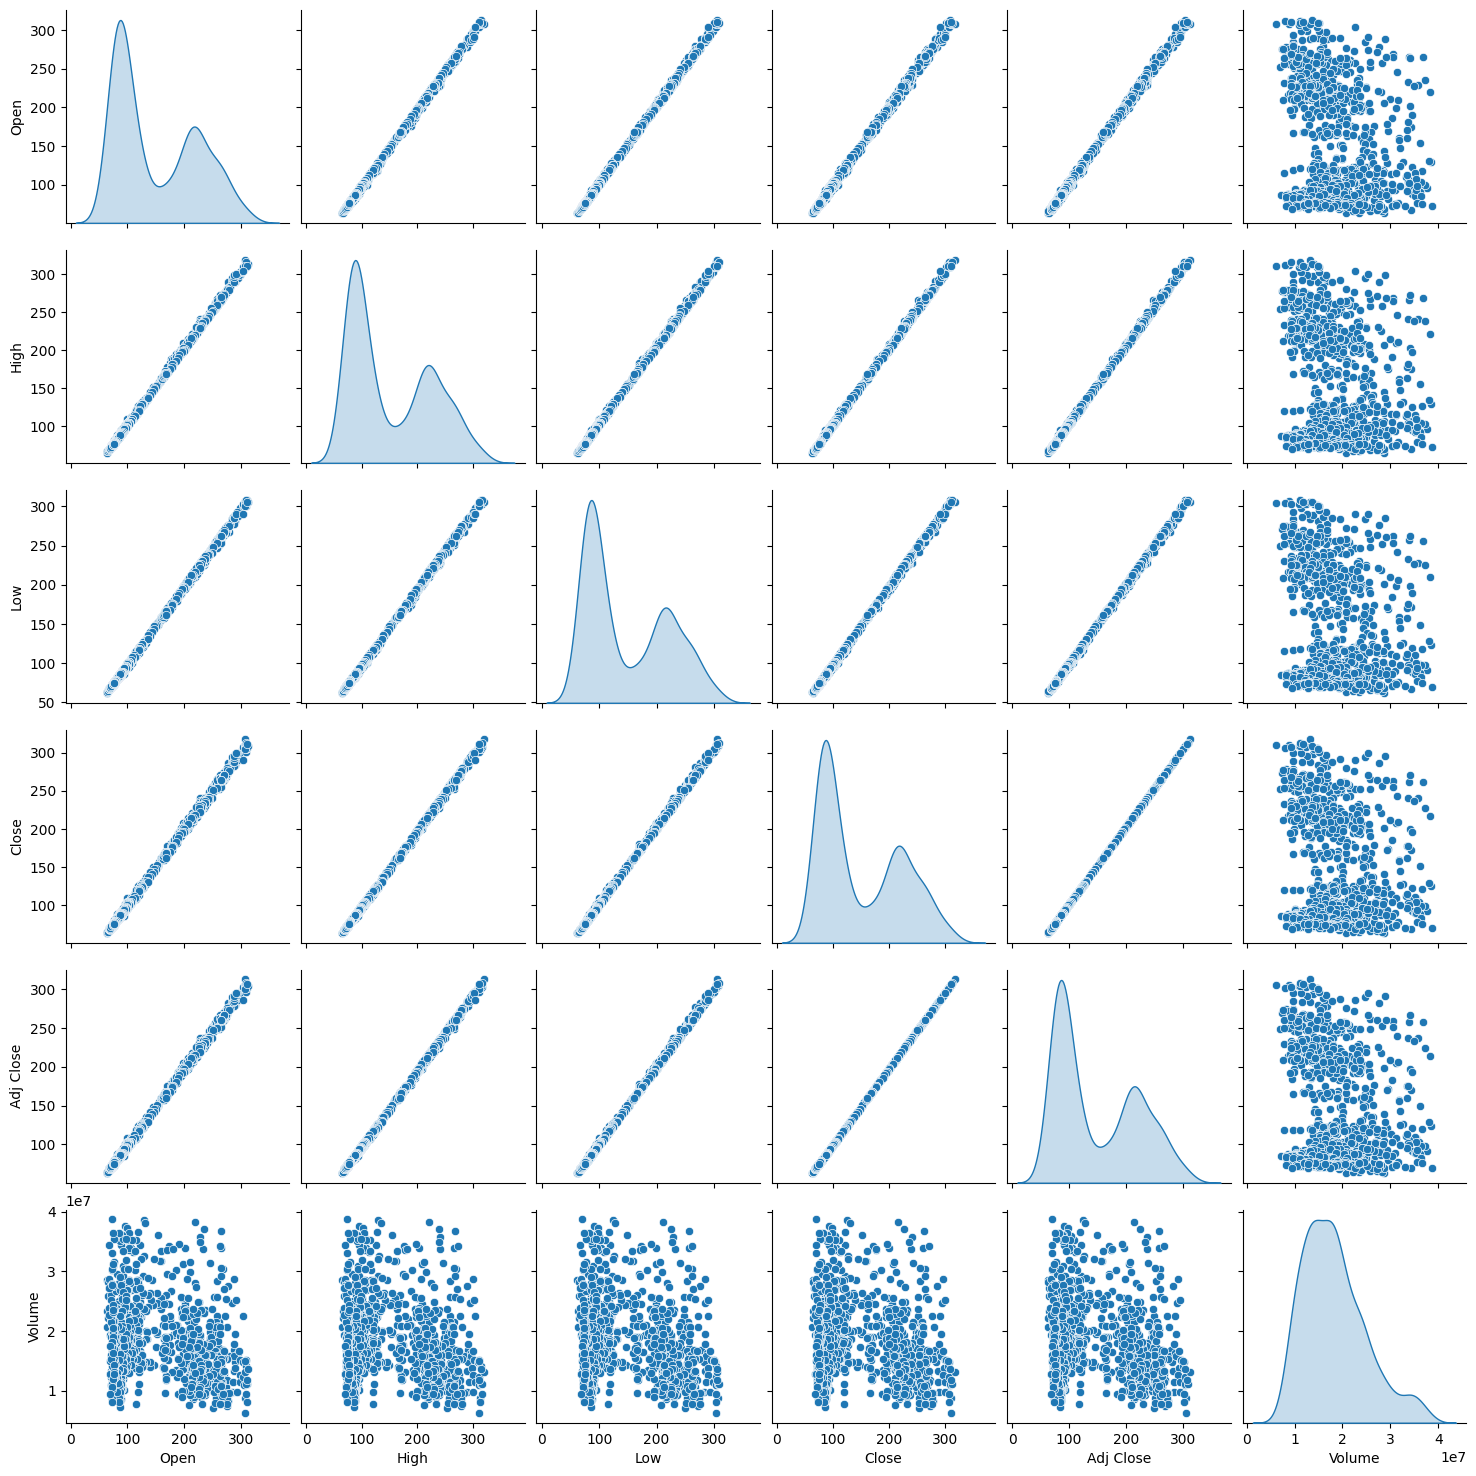

In [17]:
sns.pairplot(df, diag_kind = 'kde')

mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr()

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

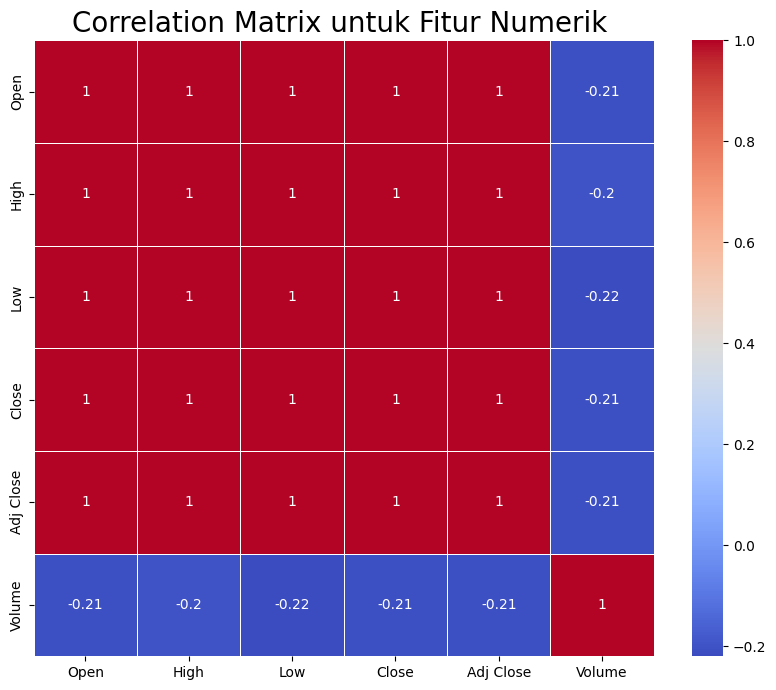

In [18]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

 fitur 'Open', 'High', 'Low', dan 'Close' memiliki skor korelasi yang besar (di atas 0.9) dengan fitur target 'Adj Close'. Artinya, fitur 'Adj Close' berkorelasi tinggi dengan keempat fitur tersebut. Sementara itu, fitur 'Volume' memiliki korelasi yang sangat kecil (-0.21). Sehingga, fitur tersebut dapat di-drop.

In [19]:
df.drop(['Volume'], inplace=True, axis=1)
df.head()

,Open,High,Low,Close,Adj Close
0,216.600006,219.979996,216.539993,219.770004,216.854889
1,216.350006,218.203003,216.009995,217.000000,214.121628
2,214.889999,217.160004,214.089996,216.639999,213.766403
3,217.639999,218.940002,216.690002,217.630005,214.743286
4,216.600006,220.649994,216.320007,218.000000,215.108368


# Data Preparation

cek menggunakan fungsi pairplot, keempat fitur ukuran df dalam 4 kolom tersebut memiliki korelasi yang tinggi. Hal ini karena keempat fitur ini memiliki informasi yang sama, yaitu ukuran df

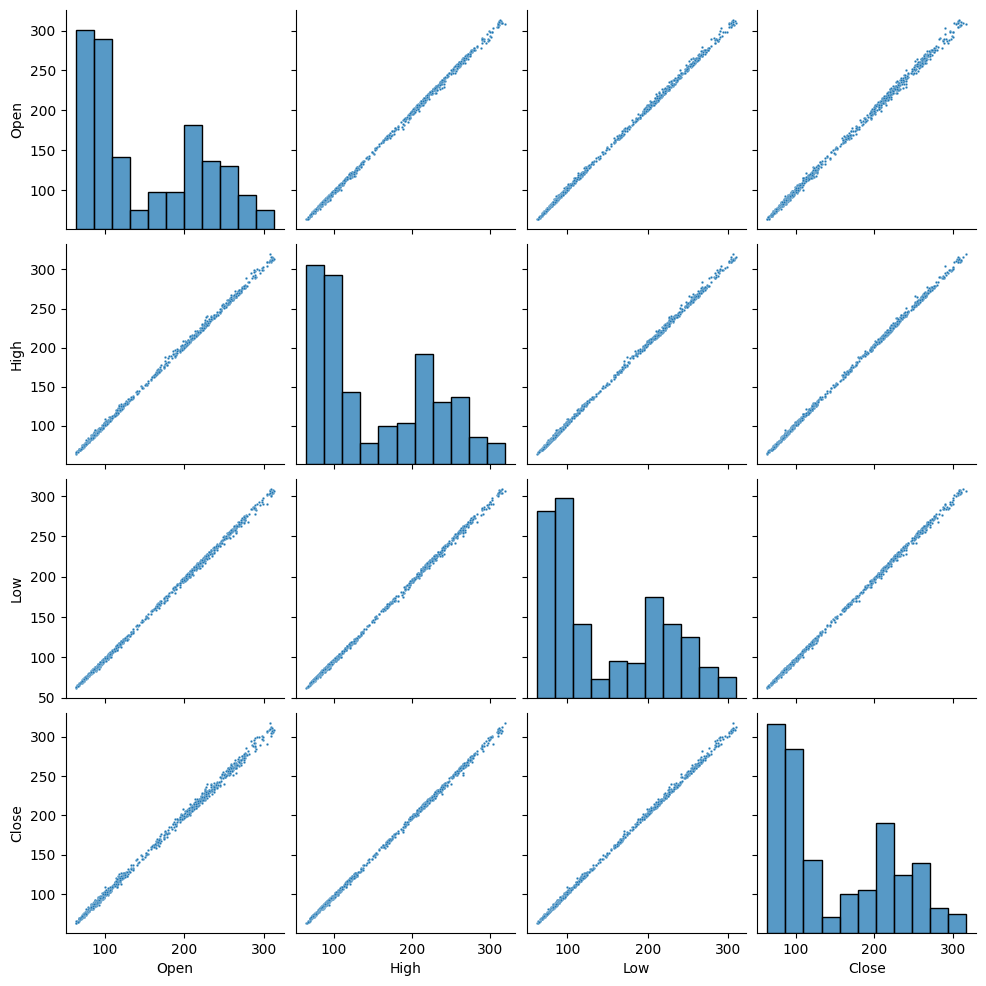

In [20]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close']], plot_kws={"s": 3});

aplikasikan class PCA dari library scikit learn dengan kode berikut.

In [21]:
pca = PCA(n_components=4, random_state=123)
pca.fit(df[['Open', 'High', 'Low', 'Close']])
princ_comp = pca.transform(df[['Open', 'High', 'Low', 'Close']])

mengetahui proporsi informasi dari keempat komponen tadi.

In [22]:
pca.explained_variance_ratio_.round(4)

array([9.997e-01, 2.000e-04, 1.000e-04, 0.000e+00])

mambahkan fitur baru ke dataset dengan nama 'dimension' dan melakukan proses transformasi.

In [23]:
pca = PCA(n_components=1, random_state=123)
pca.fit(df[['Open', 'High', 'Low', 'Close']])
df['dimension'] = pca.transform(df.loc[:, ('Open', 'High', 'Low', 'Close')]).flatten()
df.drop(['Open', 'High', 'Low', 'Close'], axis=1, inplace=True)
df.head()

,Adj Close,dimension
0,216.854889,134.586375
1,214.121628,131.916816
2,213.766403,129.530105
3,214.743286,133.585928
4,215.108368,133.930741


**Train-Test-Split**
menggunakan proporsi pembagian sebesar 90:10 dengan fungsi train_test_split dari sklearn.

In [24]:
X = df.drop(["Adj Close"],axis =1)
y = df["Adj Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

mengecek jumlah sampel pada masing-masing bagian

In [25]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1017
Total # of sample in train dataset: 915
Total # of sample in test dataset: 102


menerapkan fitur standarisasi pada data latih

In [26]:
numerical_features = ['dimension']

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,dimension
41,0.810769
961,-0.959248
819,-0.712251
763,-0.523914
354,0.884899


mengecek nilai mean dan standar deviasi pada setelah proses standarisasi

In [27]:
X_train[numerical_features].describe().round(2)

,dimension
count,915.00
mean,-0.00
std,1.00
min,-1.22
25%,-0.89
50%,-0.44
75%,0.92
max,2.27


# Model Development

In [28]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## Model Development dengan K-Nearest Neighbor

melatih data dengan KNN dan menggunakan k = 10 tetangga dan metric Euclidean untuk mengukur jarak antara titik.

In [29]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Model Development dengan Random Forest

In [30]:
# buat model prediksi random forest
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

set n_estimator=50, kedalaman=16, dan n_jobs=-1 artinya semua proses berjalan secara paralel

## Model Development dengan Boosting Algorithm

In [31]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting sebesar 0.05 dan mengontrol random number generator yang digunakan sebesar 55

# Evaluasi Model

melakukan proses scaling terhadap data uji agar skala antara data latih dan data uji sama dan kita bisa melakukan evaluasi

In [32]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

evaluasi ketiga model kita dengan metrik MSE

In [33]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,0.001799,0.002539
RF,0.000402,0.002541
Boosting,0.032853,0.030033


plot metrik tersebut dengan bar chart

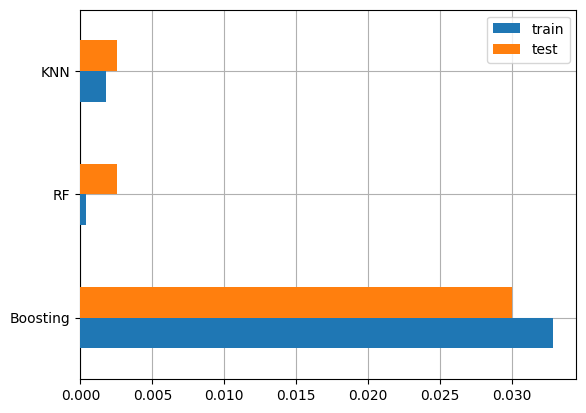

In [34]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

model KNN dan Random Forest memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma Boosting memiliki eror yang paling besar (berdasarkan grafik)

In [35]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
50,176.477676,176.2,175.1,178.1


Berdasarkan hasil evaluasi, model Random Forest dipilih sebagai model terbaik karena memiliki MSE terendah pada data pelatihan dan performa yang kompetitif pada data pengujian. Berikut adalah beberapa alasan memilih Random Forest:
* Akurasi: Random Forest memiliki MSE terendah pada data pelatihan, menunjukkan kemampuan belajar yang baik dari data.
* Generalizability: Meskipun MSE pada data pengujian sedikit lebih tinggi dari KNN, perbedaan ini kecil dan menunjukkan bahwa Random Forest memiliki generalizability yang baik.